In [1]:
import numpy as np
import matplotlib.pyplot as plt
from basis1d.findbasis import findbasis
from basis1d.tools import sym_xg, sym_uniform_atoms_x
%matplotlib inline

In [2]:
n_lib = []
xg_lib = []
atoms_x_lib = []
atoms_Z_lib = []

nh = 2
dx = 0.05
n_nh = np.loadtxt('H%d/n.txt' % nh).tolist()
Nt = len(n_nh)
n_lib.extend(n_nh)
atoms_Z_nh = [[1]*nh for i in range(Nt)]
atoms_Z_lib.extend(atoms_Z_nh)
Para_nh = np.loadtxt('H%d/Para.txt' % nh)
for i in range(Nt):
    xg_i = sym_xg(dx, len(n_nh[i]))
    xg_lib.append(xg_i.tolist())
    atoms_x_lib.append(sym_uniform_atoms_x(xg_i, Para_nh[i], nh).tolist())

nh = 4
dx = 0.05
n_nh = np.loadtxt('H%d/n.txt' % nh).tolist()
Nt = len(n_nh)
n_lib.extend(n_nh)
atoms_Z_nh = [[1]*nh for i in range(Nt)]
atoms_Z_lib.extend(atoms_Z_nh)
Para_nh = np.loadtxt('H%d/Para.txt' % nh)
for i in range(Nt):
    xg_i = sym_xg(dx, len(n_nh[i]))
    xg_lib.append(xg_i.tolist())
    atoms_x_lib.append(sym_uniform_atoms_x(xg_i, Para_nh[i], nh).tolist())
    
nh = 8
dx = 0.05
n_nh = np.loadtxt('H%d/n.txt' % nh).tolist()
Nt = len(n_nh)
n_lib.extend(n_nh)
atoms_Z_nh = [[1]*nh for i in range(Nt)]
atoms_Z_lib.extend(atoms_Z_nh)
Para_nh = np.loadtxt('H%d/Para.txt' % nh)
for i in range(Nt):
    xg_i = sym_xg(dx, len(n_nh[i]))
    xg_lib.append(xg_i.tolist())
    atoms_x_lib.append(sym_uniform_atoms_x(xg_i, Para_nh[i], nh).tolist())

# sort basis by its importance to reduce the fitting error on H data set

In [3]:
basis_data = \
{1: [('s',
   [(2.0, 0.06462908245839719),
    (0.8, 0.4066825517248162),
    (0.32, 0.5468171685012185)]),
  ('s', [(0.3306625913279761, 1.0)]),
  ('p', [(0.85113803820237643, 1.0)]),
  ('p', [(0.39869097578953416, 1.0)]),
  ('p', [(0.18675524655404496, 1.0)]),
  ('d', [(3.5696988468260646, 1.0)]),
  ('d', [(0.69515188069770728, 1.0)]),
  ('d', [(0.13537168203060615, 1.0)]),
  ('f', [(0.12689610031679222, 1.0)]),
  ('s', [(14.384498882876629, 1.0)]),
  ('s', [(0.15535037771498966, 1.0)])]}

fb = findbasis(n_lib, xg_lib, atoms_x_lib, atoms_Z_lib, basis_data, verbose=True)

primary shell is ('s', [(2.0, 0.06462908245839719), (0.8, 0.4066825517248162), (0.32, 0.5468171685012185)])
MAE=0.1693296605
sorting shell...#1
trying...shell #0 #1 #2 #3 #4 #5 #6 #7 #8 #9 done!
best shell is ('p', [(0.8511380382023764, 1.0)])
MAE=0.0745888182
sorting shell...#2
trying...shell #0 #1 #2 #3 #4 #5 #6 #7 #8 done!
best shell is ('s', [(0.15535037771498966, 1.0)])
MAE=0.0348649777
sorting shell...#3
trying...shell #0 #1 #2 #3 #4 #5 #6 #7 done!
best shell is ('p', [(0.18675524655404496, 1.0)])
MAE=0.0167513858
sorting shell...#4
trying...shell #0 #1 #2 #3 #4 #5 #6 done!
best shell is ('d', [(3.5696988468260646, 1.0)])
MAE=0.0106712228
sorting shell...#5
trying...shell #0 #1 #2 #3 #4 #5 done!
best shell is ('d', [(0.13537168203060615, 1.0)])
MAE=0.0084362498
sorting shell...#6
trying...shell #0 #1 #2 #3 #4 done!
best shell is ('d', [(0.6951518806977073, 1.0)])
MAE=0.0036870539
sorting shell...#7
trying...shell #0 #1 #2 #3 done!
best shell is ('s', [(0.3306625913279761, 1.0)])


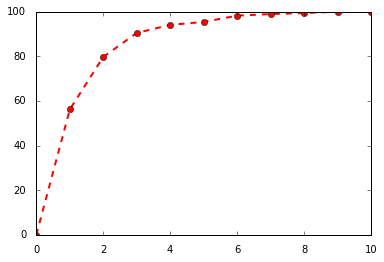

In [4]:
sort_basis = fb.basis_tier(Z=1, primary_shell=('s',
                                               [(2.0, 0.06462908245839719),
                                                (0.8, 0.4066825517248162),
                                                (0.32, 0.5468171685012185)]), showerr=True)

# By the performance shown above, the basis can be make into follow tiers

* Tier one

Based on the exact solution of single H atom

In [9]:
exp1dT1 = {1: sort_basis[0]}
print exp1dT1

{1: ('s', [(2.0, 0.06462908245839719), (0.8, 0.4066825517248162), (0.32, 0.5468171685012185)])}


* Tier two

Reduce 56% error on H chain data set by adding one p shell 

In [10]:
exp1dT2 = {1: sort_basis[:2]}
print exp1dT2

{1: [('s', [(2.0, 0.06462908245839719), (0.8, 0.4066825517248162), (0.32, 0.5468171685012185)]), ('p', [(0.8511380382023764, 1.0)])]}


* Tier three

adding one s shell, one p shell and 3 d shells reduce 98.2% error comparing to Tier one

In [11]:
exp1dT3 = {1: sort_basis[:7]}
print exp1dT3

{1: [('s', [(2.0, 0.06462908245839719), (0.8, 0.4066825517248162), (0.32, 0.5468171685012185)]), ('p', [(0.8511380382023764, 1.0)]), ('s', [(0.15535037771498966, 1.0)]), ('p', [(0.18675524655404496, 1.0)]), ('d', [(3.5696988468260646, 1.0)]), ('d', [(0.13537168203060615, 1.0)]), ('d', [(0.6951518806977073, 1.0)])]}


* Tier four

adding all shells

In [12]:
exp1dT4 = {1: sort_basis}
print exp1dT4

{1: [('s', [(2.0, 0.06462908245839719), (0.8, 0.4066825517248162), (0.32, 0.5468171685012185)]), ('p', [(0.8511380382023764, 1.0)]), ('s', [(0.15535037771498966, 1.0)]), ('p', [(0.18675524655404496, 1.0)]), ('d', [(3.5696988468260646, 1.0)]), ('d', [(0.13537168203060615, 1.0)]), ('d', [(0.6951518806977073, 1.0)]), ('s', [(0.3306625913279761, 1.0)]), ('p', [(0.39869097578953416, 1.0)]), ('s', [(14.38449888287663, 1.0)]), ('f', [(0.12689610031679222, 1.0)])]}
